In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv("Games_Data.csv")

In [ ]:
dataset.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [ ]:
x = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,-1].values

In [ ]:
print(y)

[5 4 3 ... 3 4 3]


In [ ]:
print(x)

[[1.50421000e+12 1.50421000e+12]
 [1.50413000e+12 1.50413000e+12]
 [1.50413000e+12 1.50413000e+12]
 ...
 [1.49969788e+12 1.49969805e+12]
 [1.49969613e+12 1.49969707e+12]
 [1.49964315e+12 1.49964389e+12]]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
print(x_train)

[[-0.05813176 -0.05741334]
 [ 0.72533561  0.72531667]
 [ 0.38957437  0.38954428]
 ...
 [-2.4704269  -2.47044887]
 [ 0.65745947  0.65744588]
 [ 0.09818708  0.09815685]]


In [ ]:
print(x_test)

[[-2.33231564 -2.3323325 ]
 [ 0.71366826  0.71365072]
 [-2.17380073 -2.17376649]
 ...
 [ 0.05775     0.05774886]
 [ 0.71453368  0.71452697]
 [ 0.64756986  0.6475399 ]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric= 'minkowski', p = 2)
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 45  69  57  32  26  12   5   4   1   1   0   0   0   0   0   0   1   0
    0]
 [ 77 237 157 120  60  37  10  16   1   1   1   0   3   0   0   0   0   0
    0]
 [ 81 200 207 153 105  53  17  13   6   2   5   0   1   0   0   0   0   0
    0]
 [ 77 214 202 161  88  47  22  18   9   6   1   0   1   0   0   0   0   0
    0]
 [ 47 183 155 124 106  40  20  12   4   2   2   0   1   0   0   0   1   0
    0]
 [ 36 124 106  78  70  42  14  10   3   0   3   0   2   0   0   0   0   0
    0]
 [ 37  68  70  70  44  24  16   8   6   2   2   0   1   0   0   0   0   0
    0]
 [ 23  76  72  52  27  19   9  14   4   3   2   0   0   0   0   0   0   0
    0]
 [ 14  41  38  34  19  23   4   3   0   1   1   0   0   0   0   0   0   0
    0]
 [  7  21  22  18  12  12   3   2   0   4   0   0   0   0   0   0   0   0
    0]
 [  6  17  23  21  14   6   6   2   0   0   2   0   0   0   0   0   0   0
    0]
 [  3  10   8  18   0   5   1   1   1   0   0   0   0   0   0   0   0   0
    0]
 [  0  14   9   1   6   4   

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

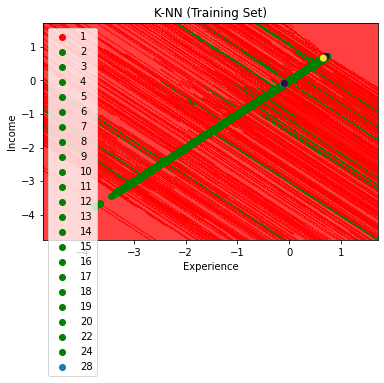

In [ ]:
from matplotlib.colors import ListedColormap
x_set,y_set = x_train,y_train
x1,x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1, stop = x_set[:,0].max()+1, step = 0.01),
                    np.arange(start = x_set[:,1].min()-1, stop = x_set[:,0].max()+1, step = 0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c= ListedColormap(('red', 'green'))(i),label = j)
plt.title('K-NN (Training Set)')
plt.xlabel('Experience')
plt.ylabel('Income')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

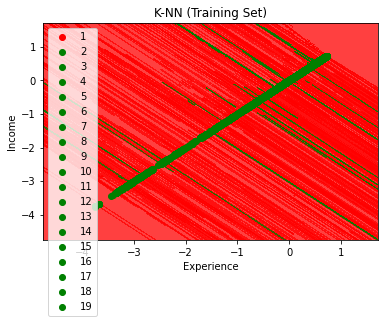

In [ ]:
from matplotlib.colors import ListedColormap
x_set,y_set = x_test,y_test
x1,x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1, stop = x_set[:,0].max()+1, step = 0.01),
                    np.arange(start = x_set[:,1].min()-1, stop = x_set[:,0].max()+1, step = 0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c= ListedColormap(('red', 'green'))(i),label = j)
plt.title('K-NN (Training Set)')
plt.xlabel('Experience')
plt.ylabel('Income')
plt.legend()
plt.show()